In [1]:
## Datos

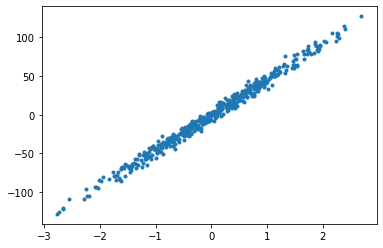

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets

n_samples = 500
X, y = datasets.make_regression(
    n_samples=n_samples,
    n_features=1,
    n_informative=2,
    noise=5,
    random_state=0
)

# n_outliers = 100
# X[:n_outliers], y[:n_outliers] = datasets.make_regression(
#     n_features=1,
#     n_informative=2,
#     noise=2,
#     random_state=61
# )

y = np.expand_dims(y, axis=1)
plt.scatter(X, y, marker='.')
plt.show()

In [58]:
def grad_quadratic(theta, f_params):
    '''
    Gradiente de la funcion de costo 
           sum_i (theta@x[i]-y[i])**2
    '''    
    X = f_params['X']
    y = f_params['y']

    err=theta[0]*X+theta[1]-y
    partial0=err
    partial1=X*partial0
    gradient= np.concatenate((partial1, partial0), axis=1)
    return np.sum(gradient, axis=0)

In [59]:
grad_quadratic([1, 1], {'X': X, 'y': y})

array([-22250.44731449,   1257.69882306])

In [44]:
grad_quadratic([1, 1], {'X': X, 'y': y})

array([-22250.44731449,   1257.69882306])

In [52]:
theta = [1, 1]

for i in range(1000):
    grad = grad_quadratic(theta, {'X': X, 'y': y})
    theta = theta - 0.001 * grad
    
theta

array([45.60138717, -0.38455448])

In [53]:
def GD(theta=[], grad=None, gd_params={}, f_params={}):

    nIter = gd_params['nIter'] 
    alpha = gd_params['alpha']
    Theta=[]
    for t in range(nIter):
        p = grad(theta,f_params=f_params)
        theta = theta - alpha*p
        Theta.append(theta)
    return np.array(Theta)

In [55]:
GD(theta=[1, 1], grad = grad_quadratic, gd_params={'nIter': 1000,  'alpha':0.001}, 
                       f_params={'X': X, 'y': y})

array([[23.25044731, -0.25769882],
       [34.39354976, -0.60447443],
       [39.97764346, -0.63659867],
       ...,
       [45.60138717, -0.38455448],
       [45.60138717, -0.38455448],
       [45.60138717, -0.38455448]])

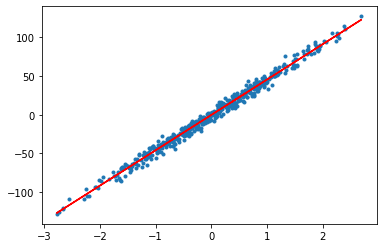

In [42]:
yh = -0.38 + X*(45.6)
plt.scatter(X, y, marker='.')
plt.plot(X, yh, c='red')
plt.show()

In [41]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

model.coef_
model.intercept_

array([-0.38455448])